In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

-------------------------COMMENTS-----------------------

In [2]:
comments=pd.read_csv("C:/Users/sampa/Desktop/EDA Practice/DataForEDA/GBcomments.csv",error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head(3)

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   

   replies  
0        0  
1        0  
2        0

In [4]:
!pip install textblob

In [5]:
from textblob import TextBlob

In [6]:
comments.isnull().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [7]:
comments.dropna(inplace=True)

In [8]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [9]:
#Polarity-->1 then positive sentiment analysis
#Polarity-->-1 then negative sentiment analysis

In [10]:
TextBlob("It's more accurate to call it the M+ (1000) be...").sentiment.polarity

0.45000000000000007

In [11]:
TextBlob("Thank gosh, a place I can watch it without hav...").sentiment.polarity

0.0

In [12]:
polarity=[]
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [13]:
comments['polarity']=polarity

In [14]:
comments.head(10)

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
5  jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...      0   
6  jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!      0   
7  jt2OHQh0HoQ  You will never find Losers who line up and pay...      0   
8  jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...      0   
9  jt2OHQh0HoQ  I'm only here to see Emma, I love her so much!...      0   

   replies  polarity  
0        0  0.450000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  1.000000  
5        0  0.300000  
6        0  0.000000  
7        0 -0.100000  
8        0  0.028571  
9        0  0.500000

-----------------------------------------EDA----------------------------------------------------

In [16]:
comments_positive=comments[comments['polarity']==1]
comments_positive.shape

(20400, 5)

In [18]:
comments_negative=comments[comments['polarity']==-1]
comments_negative.shape

(3339, 5)

In [19]:
!pip install wordcloud

In [20]:
from wordcloud import WordCloud,STOPWORDS

-----------------------POSITIVE COMMENTS----------------------

In [21]:
stopwords=set(STOPWORDS)
total_comments=' '.join(comments_positive['comment_text'])

In [22]:
wordcloud=WordCloud(width=1500,height=1000,stopwords=stopwords).generate(total_comments)

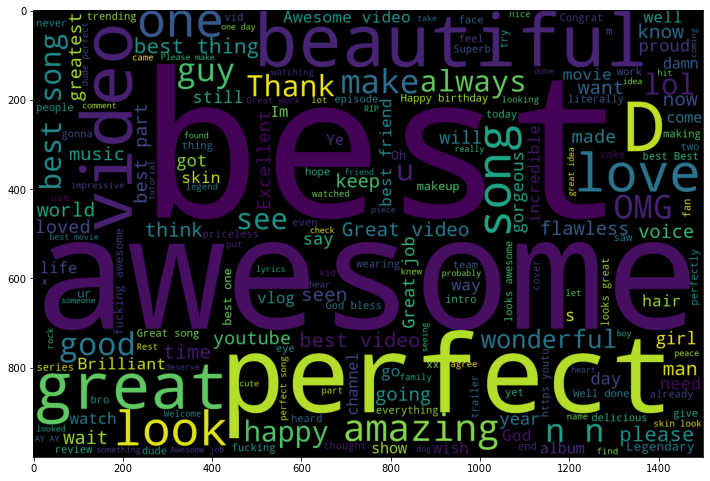

In [25]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

------------------------------NEGATIVE COMMENTS--------------------------------

In [27]:
total_comments=' '.join(comments_negative['comment_text'])
wordcloud=WordCloud(width=2000,height=1500,stopwords=stopwords).generate(total_comments)

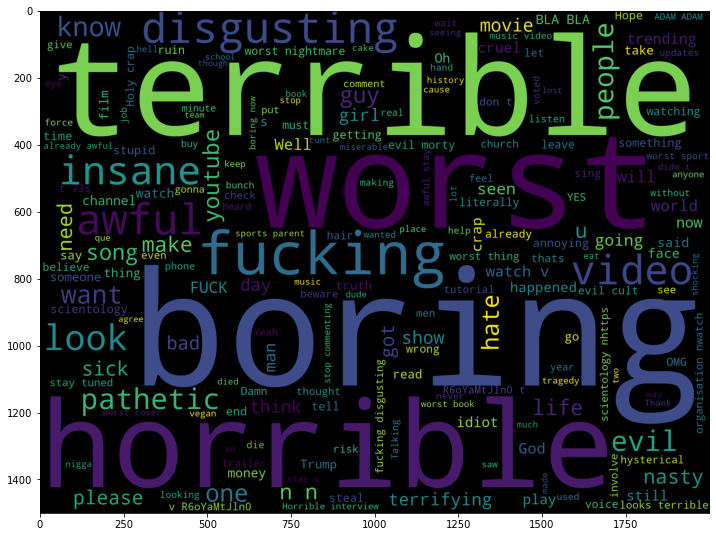

In [28]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

-----------------------------------VIDEOS-----------------------------------

In [29]:
videos=pd.read_csv("C:/Users/sampa/Desktop/EDA Practice/DataForEDA/USvideos.csv",error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [30]:
videos.shape

(7992, 11)

In [31]:
videos.head(3)

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09

In [32]:
tags_complete=' '.join(videos['tags'])

In [33]:
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [34]:
import re

In [35]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)

In [36]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [37]:
tags=re.sub(' +',' ',tags)

In [38]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

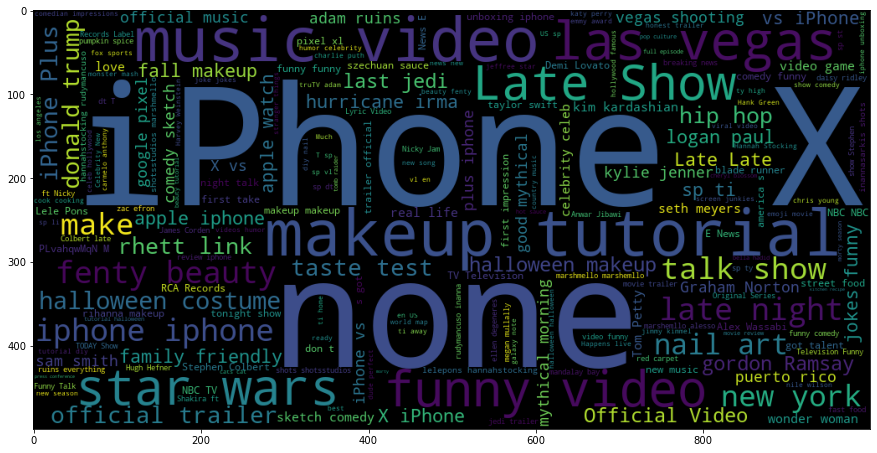

In [41]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)

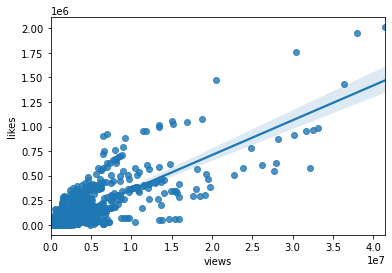

In [43]:
import seaborn as sns
sns.regplot(data=videos,x='views',y='likes')

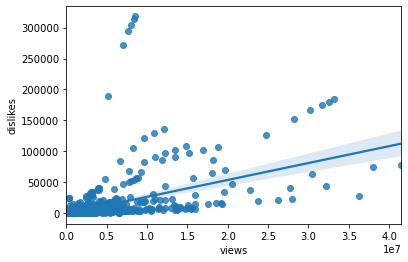

In [44]:
sns.regplot(data=videos,x='views',y='dislikes')